In [1]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
from CoolProp.HumidAirProp import HAPropsSI
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
t = [x for x in np.arange(start = 20, stop = 38, step = 1)]
rh = [x for x in np.arange(start = 90, stop = 20, step = -5)]

In [3]:
df_d = pd.DataFrame(0, index=rh, columns=t)

In [4]:
df_d = df_d.stack().to_frame().apply(lambda x: HAPropsSI('W','T',x.name[1]+273.15,'P',101325,'R',x.name[0]/100)*1000, axis=1).unstack()
print(df_d)

           20         21         22         23         24         25  \
90  13.252993  14.115941  15.029137  15.995231  17.017005  18.097386   
85  12.501915  13.314933  14.175155  15.085054  16.047224  17.064391   
80  11.752612  12.515940  13.323460  14.177470  15.080381  16.034724   
75  11.005076  11.718954  12.474042  13.272469  14.116465  15.008370   
70  10.259302  10.923968  11.626893  12.370039  13.155461  13.985313   
65   9.515283  10.130975  10.782003  11.470169  12.197356  12.965537   
60   8.773014   9.339966   9.939364  10.572850  11.242138  11.949027   
55   8.032487   8.550934   9.098966   9.678068  10.289794  10.935766   
50   7.293698   7.763873   8.260801   8.785815   9.340310   9.925739   
45   6.556639   6.978774   7.424859   7.896080   8.393673   8.918931   
40   5.821305   6.195630   6.591132   7.008850   7.449872   7.915327   
35   5.087689   5.414434   5.759610   6.124117   6.508892   6.914911   
30   4.355786   4.635179   4.930286   5.241870   5.570722   5.91

In [5]:
plt.rcParams["font.family"] = "Liberation Sans"

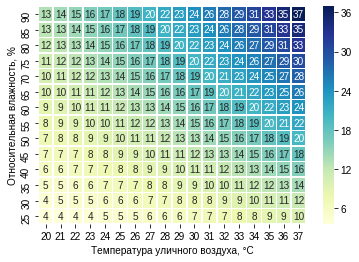

In [6]:
fig, ax = plt.subplots()
ax = sns.heatmap(df_d, annot=True, fmt='.0f', linewidths=0.5, cmap="YlGnBu")
plt.xlabel('Температура уличного воздуха, °С')
plt.ylabel('Относительная влажность, %')
plt.show()

In [11]:
d = [x for x in np.arange(start = 15, stop = 8, step =-1)]
s = [x for x in np.arange(start = 5, stop = 70, step = 5)]
df_v = pd.DataFrame(0, index=d, columns=s)

In [12]:
def volume_flow (s, d):
    d_pool = 16.11
    ro = 1.2
    wg=s/10*1.9
    flow = wg/((d_pool-d)*ro/1000)/1000
    if flow<=0:
        flow= np.nan
    return flow
    

In [13]:
df_v = df_v.stack().to_frame().apply(lambda x: volume_flow (x.name[1],x.name[0]), axis=1).unstack()

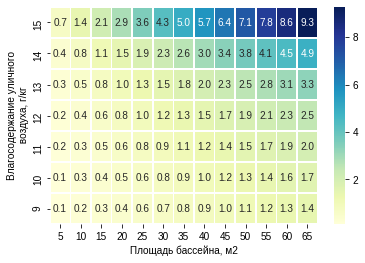

In [14]:
fig, ax = plt.subplots()
ax = sns.heatmap(df_v, annot=True, fmt='.1f', linewidths=0.75, cmap="YlGnBu")
plt.xlabel('Площадь бассейна, м2')
plt.ylabel('Влагосодержание уличного\n воздуха, г/кг')
plt.show()

In [16]:
print(df_d.stack().to_frame())

               0
90 20  13.252993
   21  14.115941
   22  15.029137
   23  15.995231
   24  17.017005
...          ...
25 33   7.859641
   34   8.318069
   35   8.799937
   36   9.306285
   37   9.838194

[252 rows x 1 columns]


In [38]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt


delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

In [40]:
Z

array([[ 4.52063104e-06,  5.24894067e-06,  6.08697321e-06, ...,
         9.82013796e-07,  5.79256020e-07,  2.55995511e-07],
       [ 4.99294681e-06,  5.79735018e-06,  6.72294028e-06, ...,
         7.40995503e-07,  3.27884007e-07,  2.57498016e-19],
       [ 5.50772112e-06,  6.39505861e-06,  7.41607717e-06, ...,
         4.18911596e-07,  3.15943289e-19, -3.27884007e-07],
       ...,
       [ 5.97236348e-06,  6.92886625e-06,  8.02817162e-06, ...,
        -2.08885159e-02, -1.89602868e-02, -1.71885358e-02],
       [ 5.41648023e-06,  6.28368636e-06,  7.28030161e-06, ...,
        -1.99324015e-02, -1.80924123e-02, -1.64017434e-02],
       [ 4.90598951e-06,  5.69120666e-06,  6.59353913e-06, ...,
        -1.89962699e-02, -1.72426787e-02, -1.56313990e-02]])

Text(0.5, 1.0, 'Simplest default with labels')

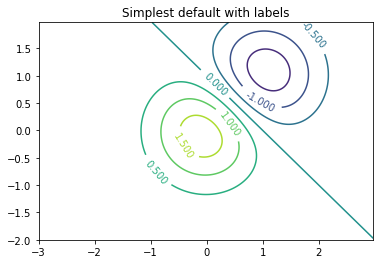

In [122]:
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Simplest default with labels')